全市场主动买入成交额占比

In [1]:
import polars as pl
import numpy as np

# 读取数据
data = pl.read_parquet("hourly_data.pa")

df = data.sort('open_time').sort('symbol')

# 计算每个时刻所有 symbol 的 taker_buy_quote_volume 的总和
df = df.with_columns([
    pl.col("taker_buy_quote_volume").sum().over("open_time").alias("total_taker_buy_quote_volume"),
    (pl.col('close') / (pl.col('close').shift(1).over('symbol')) - 1).alias('return')
])

# 计算每个 symbol 在每个时刻的 taker_buy_quote_volume 与总和的比例
df = df.with_columns([
    (pl.col("taker_buy_quote_volume") / pl.col("total_taker_buy_quote_volume")).alias("taker_buy_quote_volume_ratio_perday")
])

df

open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,symbol,total_taker_buy_quote_volume,return,taker_buy_quote_volume_ratio_perday
datetime[μs],f64,f64,f64,f64,f64,datetime[μs],f64,i64,f64,f64,str,f64,f64,f64
2022-09-09 13:00:00,0.4728,0.4874,0.3663,0.451,6.5705837e7,2022-09-09 13:59:59.999,2.8487e7,124200,3.3701922e7,1.4632e7,"""1000LUNCUSDT""",1.2528e9,null,0.01168
2022-09-09 14:00:00,0.451,0.4609,0.4277,0.4592,4.1316126e7,2022-09-09 14:59:59.999,1.8355e7,94104,2.0298138e7,9.0220e6,"""1000LUNCUSDT""",9.6070e8,0.018182,0.009391
2022-09-09 15:00:00,0.4594,0.4734,0.4416,0.4555,4.4134479e7,2022-09-09 15:59:59.999,2.0198e7,103417,2.2353913e7,1.0239e7,"""1000LUNCUSDT""",1.2401e9,-0.008057,0.008257
2022-09-09 16:00:00,0.4554,0.458,0.4175,0.4297,4.6242265e7,2022-09-09 16:59:59.999,2.0187e7,84951,2.1467246e7,9.3760e6,"""1000LUNCUSDT""",1.3778e9,-0.056641,0.006805
2022-09-09 17:00:00,0.4297,0.4418,0.4071,0.4156,2.661109e7,2022-09-09 17:59:59.999,1.1376e7,50896,1.2655405e7,5.4132e6,"""1000LUNCUSDT""",9.5344e8,-0.032814,0.005678
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2022-12-31 19:00:00,0.1494,0.1498,0.1494,0.1496,748908.5,2022-12-31 19:59:59.999,112011.25443,882,481198.1,71987.20389,"""ZRXUSDT""",1.7238e8,0.001339,0.000418
2022-12-31 20:00:00,0.1496,0.1497,0.1494,0.1496,501195.0,2022-12-31 20:59:59.999,74979.34106,751,282290.8,42242.69096,"""ZRXUSDT""",1.0815e8,0.0,0.000391
2022-12-31 21:00:00,0.1496,0.1497,0.149,0.149,413737.4,2022-12-31 21:59:59.999,61817.02306,583,132775.7,19839.82814,"""ZRXUSDT""",1.0991e8,-0.004011,0.000181


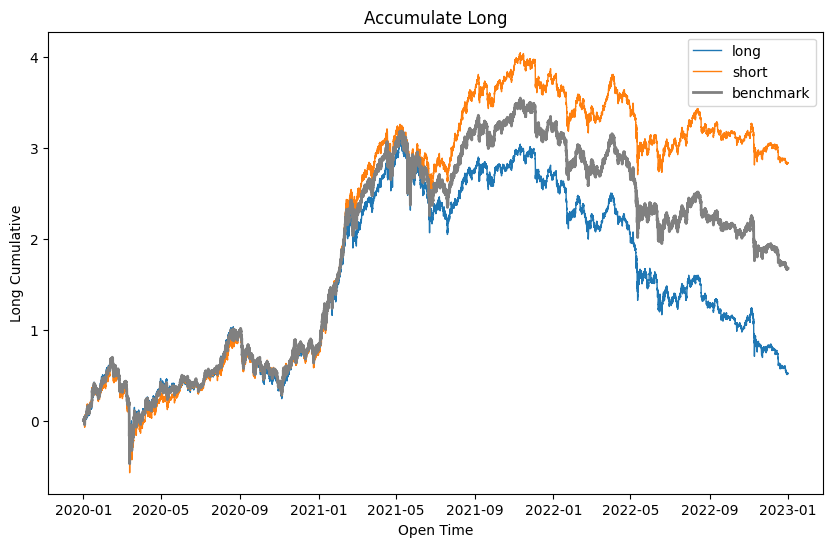

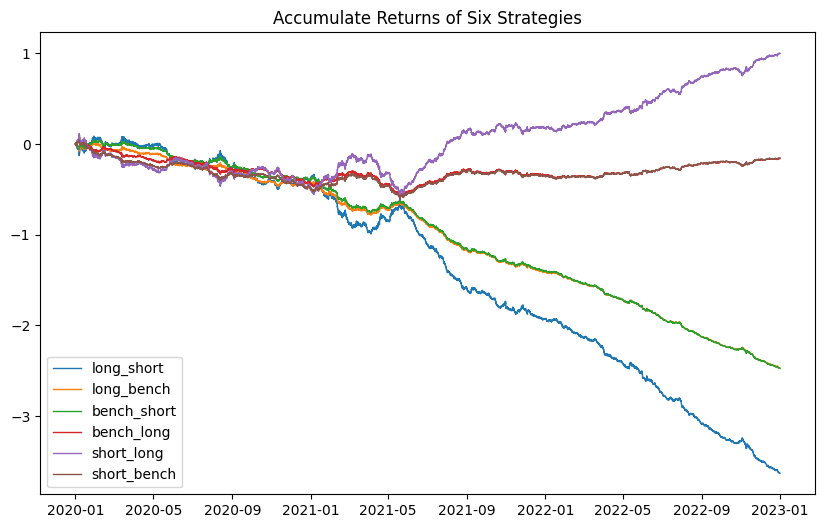

long: 
ann_return = 0.1729  sharpe = 0.1575  maxdd = 0.6642  calmar_ratio = 0.2603  

short: 
ann_return = 0.9436  sharpe = 0.8636  maxdd = 0.7413  calmar_ratio = 1.2729  

bench: 
ann_return = 0.5575  sharpe = 0.513  maxdd = 0.6895  calmar_ratio = 0.8085  

long_short: 
ann_return = -1.2087  sharpe = -4.4583  maxdd = 3.4225  calmar_ratio = -0.3532  

long_bench: 
ann_return = -0.8226  sharpe = -6.0086  maxdd = 2.4509  calmar_ratio = -0.3356  

bench_long: 
ann_return = -0.0534  sharpe = -0.3898  maxdd = 0.6251  calmar_ratio = -0.0854  

short_long: 
ann_return = 0.3327  sharpe = 1.2271  maxdd = 0.655  calmar_ratio = 0.5079  

short_bench: 
ann_return = -0.052  sharpe = -0.3817  maxdd = 0.6357  calmar_ratio = -0.0817  

bench_short: 
ann_return = -0.824  sharpe = -6.0532  maxdd = 2.4205  calmar_ratio = -0.3404  



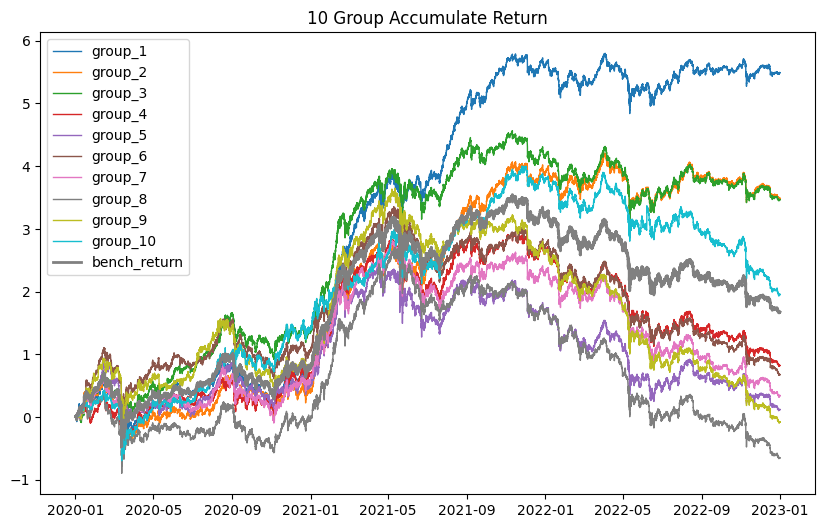

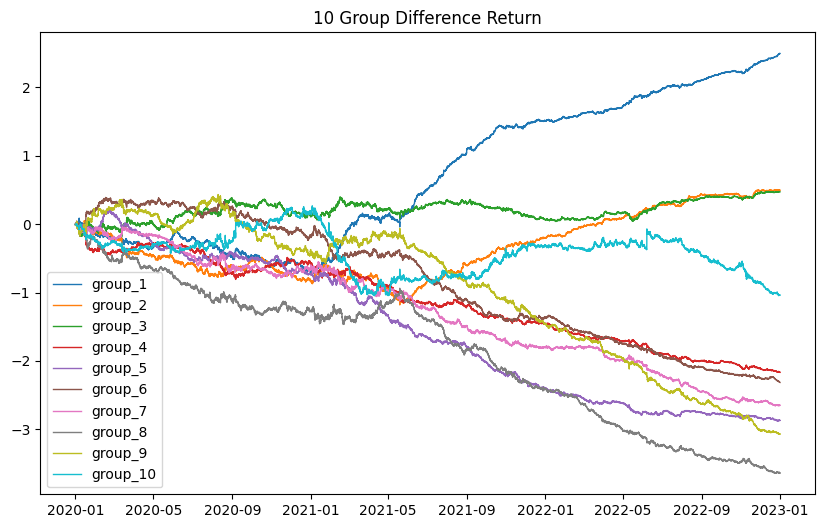

group_1: 
ann_return = 1.8276  sharpe = 1.6639  maxdd = 0.78  calmar_ratio = 2.343  

group_2: 
ann_return = 1.1614  sharpe = 1.0232  maxdd = 0.8004  calmar_ratio = 1.451  

group_3: 
ann_return = 1.1533  sharpe = 1.0153  maxdd = 0.7522  calmar_ratio = 1.5332  

group_4: 
ann_return = 0.2737  sharpe = 0.2429  maxdd = 0.7765  calmar_ratio = 0.3524  

group_5: 
ann_return = 0.0397  sharpe = 0.0351  maxdd = 0.6931  calmar_ratio = 0.0572  

group_6: 
ann_return = 0.2245  sharpe = 0.1954  maxdd = 0.6166  calmar_ratio = 0.3641  

group_7: 
ann_return = 0.1129  sharpe = 0.0968  maxdd = 0.6905  calmar_ratio = 0.1635  

group_8: 
ann_return = -0.2176  sharpe = -0.1854  maxdd = 0.9228  calmar_ratio = -0.2358  

group_9: 
ann_return = -0.0265  sharpe = -0.0223  maxdd = 0.8054  calmar_ratio = -0.0329  

group_10: 
ann_return = 0.6504  sharpe = 0.5757  maxdd = 0.7862  calmar_ratio = 0.8272  

-----------------------------------------
group_difference_1: 
ann_return = 0.8321  sharpe = 2.9027  maxdd 

In [2]:
from factor_analysis.factor_analysis import FactorAnalysis

factors = df.select(['open_time', 'symbol', 'taker_buy_quote_volume_ratio_perday'])

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()